In [2]:
#author: ML Tlachac

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
fileset = ["tRdf.csv", "cRdf2.csv", "cRdf3.csv", "cRdf4.csv", "cRdf0.25.csv", "cRdf0.5.csv", "cRdf0.75.csv", "cRdf0.75w.csv", "cRdf0.5w.csv", "cRdf0.25w.csv", "nRdf.csv"]
nameset = ['1', "C(2)", "C(3)", "C(4)", "C(25%)", "C(50%)", "C(75%)", "C(0.75)", "C(0.5)", "C(0.25)", "All"]

In [3]:
dfk = pd.read_csv("resultskNN118.csv")
dfk = dfk[dfk.parameter == 7]
dfs = pd.read_csv("resultsSVC118.csv")
dfs = dfs[dfs.parameter == "poly"]
dfr = pd.read_csv("resultsgRF118.csv")
dfr = dfr[dfr.parameter == "gini4"]
dfx = pd.read_csv("resultsXG118.csv")
dfx = dfx[dfx.parameter == 3]
dfl = pd.read_csv("resultsLR118.csv")

dfn = pd.read_csv("resultsgNB15p128.csv")
dfn = dfn[dfn.nFeatures == 45]
dfa = pd.read_csv("resultsADA118.csv")
dfb = pd.read_csv("resultsBNB118.csv")
modelList = [dfk, dfs, dfr, dfa, dfx, dfl, dfn]
modelNames = ["kNN", "SVC", "Random Forest", "AdaBoost", "XGBoost", "Logistic Regression", "Gaussian Naive Bayes"]

In [160]:
saveName = ["kNN", "SVC", "RF", "AdaBoost", "XGBoost", "LR", "GNB"]
avgList = []
mcount = 0
for model in modelList: 
    df = pd.DataFrame()
    averages = []
    for f in range(0, len(fileset)):
        df[nameset[f]] = list(model[model["file"] == fileset[f]].f1List)
        averages.append(sum(model[model["file"] == fileset[f]].f1List)/100)
    avgList.append(max(averages))
    print(max(averages))
    plt.figure(figsize = (16, 4))
    plt.xlabel("Number of Contacts", fontsize = 12)
    plt.ylabel("F1", fontsize = 12)
    plt.title(modelNames[mcount], fontsize = 15)
    df.boxplot(column = nameset)
    plt.savefig("pics/" + saveName[mcount] + "100.pdf")
    #plt.show()
    plt.close()
    mcount += 1

0.5964139234526009
0.5763267025377766
0.5753112974662896
0.5500477726151566
0.5682160363737228
0.5206539531467372
0.6528572429044607


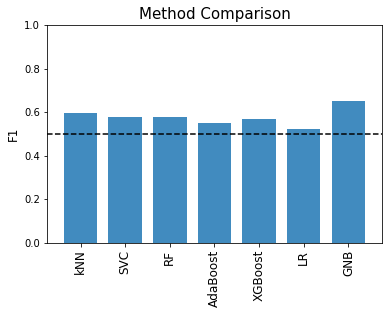

In [144]:
plt.figure(figsize = (6, 4))
plt.bar(saveName, avgList, width = 0.75, alpha = 0.85)#, color = colorList)
plt.plot((-0.75, 7.75), (0.5, 0.5), color = 'k', ls = '--')
plt.xlim(-0.75, 6.75)
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.ylim(0, 1)
plt.ylabel("F1", fontsize = 12)
plt.title("Method Comparison", fontsize = 15)
plt.savefig("pics/MethodComparison100.eps")
plt.show()
plt.close()

In [5]:
modelList2 = [dfn]
modelNames2 = ["Gaussian Naive Bayes"]
mcount = 0
for model in modelList2:
    print(modelNames2[mcount])
    df1 = model[model.file == "nRdf.csv"]
    for file in fileset:
        print("-----------------------------")
        print(file)
        df2 = model[model["file"] == file]
        print(sum(df2[df2["file"] == file].f1List)/100)
        print(stats.ttest_ind(df2.f1List, df1.f1List))
    print("")
    print("")
    print("")
    mcount += 1

Gaussian Naive Bayes
-----------------------------
tRdf.csv
0.6067235589911046
Ttest_indResult(statistic=6.9981596683730025, pvalue=3.920691193244682e-11)
-----------------------------
cRdf2.csv
0.6260384598893207
Ttest_indResult(statistic=10.40405824344061, pvalue=1.675355161769852e-20)
-----------------------------
cRdf3.csv
0.6057126871341662
Ttest_indResult(statistic=6.2230756879463565, pvalue=2.8515733424454043e-09)
-----------------------------
cRdf4.csv
0.6106098199307434
Ttest_indResult(statistic=6.2614700475907465, pvalue=2.3227532736896097e-09)
-----------------------------
cRdf0.25.csv
0.6193048340756182
Ttest_indResult(statistic=11.48549865802224, pvalue=9.925247198980452e-24)
-----------------------------
cRdf0.5.csv
0.5367480785772593
Ttest_indResult(statistic=-0.7461851149462868, pvalue=0.45644060918022944)
-----------------------------
cRdf0.75.csv
0.5398483881978089
Ttest_indResult(statistic=-0.28916004549839186, pvalue=0.7727614415373637)
-----------------------------

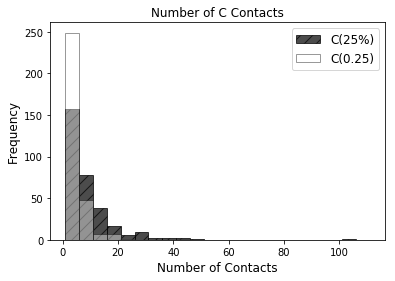

In [230]:
df25p = pd.read_csv("cRdf0.25.csv")
df25w = pd.read_csv("cRdf0.25w.csv")
dfAll = pd.read_csv("nRdf.csv")
count = []
for i in range(0, dfAll.shape[0]):
    count.append(i)

binsn = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420]

import numpy as np
binsc = np.arange(1, 115, 5)
 
plt.hist(df25p.k_nAddress, bins = binsc, color = 'k', alpha = 0.7, edgecolor = 'k', label = "C(25%)", hatch = "//")
plt.hist(df25w.k_nAddress, bins = binsc, color = 'w', alpha = 0.4, edgecolor = 'k', label = "C(0.25)", hatch = " ")
plt.legend(fontsize=12)
plt.xlabel("Number of Contacts", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.savefig("pics/Contacts2.pdf")
plt.show()
plt.close()